In [1272]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from matplotlib.colors import ListedColormap

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import cm

# File 1

In [1273]:
df = pd.read_csv("Aggregation.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [1274]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05
...,...,...
783,7.80,3.35
784,8.05,2.75
785,8.50,3.25
786,8.10,3.55


In [1275]:
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([3, 2, 4, 7, 4, 4, 3, 4, 4, 2, 6, 4, 7, 4, 2, 2, 3, 4, 4, 5, 3, 4,
       6, 3, 2, 4, 6, 3, 6, 5, 4, 5, 3, 4, 2, 3, 6, 3, 6, 4, 3, 4, 6, 6,
       6, 3, 2, 2, 6, 2, 6, 5, 6, 2, 2, 4, 4, 2, 4, 4, 3, 3, 2, 6, 2, 2,
       4, 4, 4, 6, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 2, 1, 7, 6, 2, 3, 6,
       1, 6, 6, 4, 4, 2, 2, 6, 1, 4, 3, 4, 1, 2, 4, 4, 2, 4, 4, 6, 2, 6,
       6, 5, 4, 6, 3, 4, 2, 1, 7, 4, 2, 6, 4, 6, 4, 2, 4, 6, 4, 6, 4, 4,
       1, 4, 2, 3, 2, 4, 4, 1, 2, 4, 6, 1, 4, 4, 1, 3, 2, 4, 4, 3, 4, 2,
       2, 4, 3, 4], dtype=int64)

c:\Users\Ahmed Kahla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


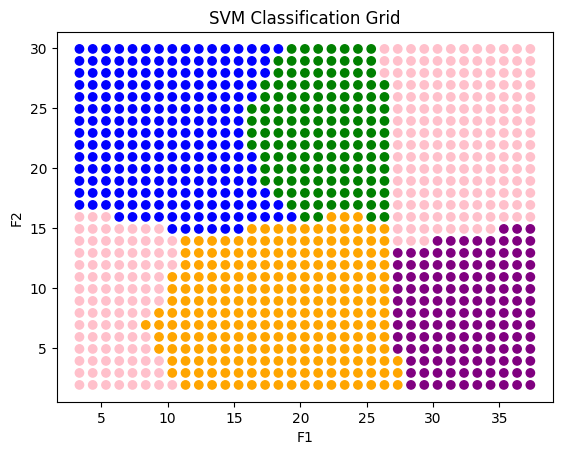

In [1276]:
def generate_grid_points(df, step=1):
  min_f1 = df["C1"].min()
  max_f1 = df["C1"].max()
  min_f2 = df["C2"].min()
  max_f2 = df["C2"].max()

  x_values = np.arange(min_f1, max_f1 + step, step)
  y_values = np.arange(min_f2, max_f2 + step, step)
  x_mesh, y_mesh = np.meshgrid(x_values, y_values)
  return np.column_stack((x_mesh.flatten(), y_mesh.flatten()))

def assign_class_colors(svm, grid_points):

  class_labels = svm.predict(grid_points)
  unique_classes = np.unique(class_labels)

  num_classes = len(unique_classes)
  cmap = ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'pink'][:num_classes])

  class_colors = [cmap(label) for label in class_labels]

  return class_labels, class_colors
X = df[["C1", "C2"]]  
y = np.array(df["Label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(C=100, kernel='rbf') 
svm.fit(X_train, y_train)

grid_points = generate_grid_points(df)

class_labels, class_colors = assign_class_colors(svm, grid_points)

plt.scatter(grid_points[:, 0], grid_points[:, 1], c=class_colors)  
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('SVM Classification Grid')
plt.show()

In [1277]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  0.9936708860759493


# File 2 

In [1278]:
df = pd.read_csv("Compound.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
...,...,...,...
394,15.85,9.95,6
395,15.35,9.90,6
396,15.60,9.45,6
397,15.30,9.15,6


In [1279]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95
...,...,...
394,15.85,9.95
395,15.35,9.90
396,15.60,9.45
397,15.30,9.15


In [1280]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([4, 5, 1, 4, 2, 2, 5, 2, 4, 2, 1, 5, 2, 2, 2, 1, 5, 5, 5, 5, 2, 1,
       6, 5, 1, 6, 2, 5, 5, 2, 6, 5, 5, 2, 5, 2, 2, 5, 3, 2, 5, 2, 2, 1,
       2, 5, 3, 3, 1, 3, 1, 5, 5, 2, 5, 1, 5, 5, 1, 3, 2, 4, 3, 2, 2, 1,
       5, 5, 4, 2, 5, 2, 1, 1, 6, 5, 5, 5, 3, 5], dtype=int64)

c:\Users\Ahmed Kahla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


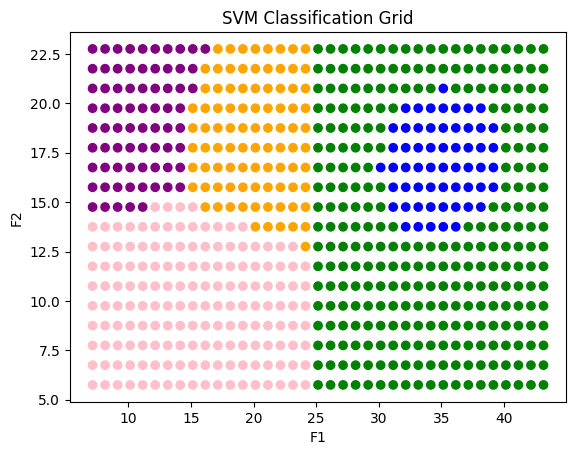

In [1281]:
def generate_grid_points(df, step=1):
  min_f1 = df["C1"].min()
  max_f1 = df["C1"].max()
  min_f2 = df["C2"].min()
  max_f2 = df["C2"].max()

  x_values = np.arange(min_f1, max_f1 + step, step)
  y_values = np.arange(min_f2, max_f2 + step, step)
  x_mesh, y_mesh = np.meshgrid(x_values, y_values)
  return np.column_stack((x_mesh.flatten(), y_mesh.flatten()))

def assign_class_colors(svm, grid_points):

  class_labels = svm.predict(grid_points)
  unique_classes = np.unique(class_labels)

  num_classes = len(unique_classes)
  cmap = ListedColormap(['red', 'green', 'blue', 'purple', 'orange', 'pink'][:num_classes])

  class_colors = [cmap(label) for label in class_labels]

  return class_labels, class_colors

X = df[["C1", "C2"]]  
y = np.array(df["Label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(C=100, kernel='rbf') 
svm.fit(X_train, y_train)
grid_points = generate_grid_points(df)

class_labels, class_colors = assign_class_colors(svm, grid_points)
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=class_colors) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('SVM Classification Grid')
plt.show()

In [1282]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  0.9875


# FILE 3 

In [1283]:
df = pd.read_csv("Flame.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
...,...,...,...
235,7.50,26.20,1
236,7.50,25.65,1
237,7.05,25.85,1
238,6.90,27.15,1


In [1284]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35
...,...,...
235,7.50,26.20
236,7.50,25.65
237,7.05,25.85
238,6.90,27.15


In [1285]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2], dtype=int64)

In [1286]:
svm = SVC(C=10, kernel='rbf', gamma=0.5)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.5)

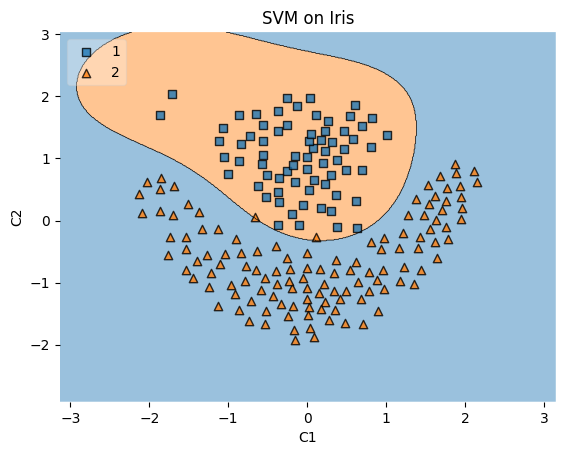

In [1287]:
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('SVM on Iris')
plt.show()

In [1288]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  1.0


# File 4

In [1289]:
df = pd.read_csv("Jain.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


In [1290]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,0.85,17.45
1,0.75,15.60
2,3.30,15.45
3,5.25,14.20
4,4.90,15.65
...,...,...
368,38.75,16.85
369,39.00,16.60
370,38.25,17.35
371,39.50,16.95


In [1291]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

In [1292]:
svm = SVC(C=10, kernel='rbf', gamma=0.5)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.5)

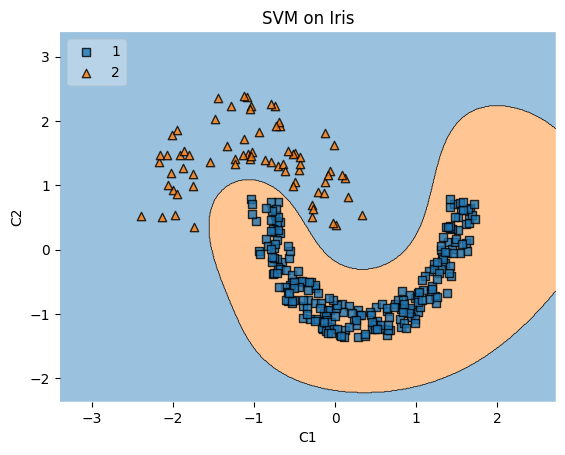

In [1293]:
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('SVM on Iris')
plt.show()

In [1294]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  1.0


# file 5

In [1295]:
df = pd.read_csv("Pathbased.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
...,...,...,...
295,17.50,18.05,2
296,16.65,17.50,2
297,15.45,17.30,2
298,15.45,17.80,2


In [1296]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,11.25,5.05
1,10.95,4.70
2,9.85,5.80
3,9.80,5.75
4,9.15,6.80
...,...,...
295,17.50,18.05
296,16.65,17.50
297,15.45,17.30
298,15.45,17.80


In [1297]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([2, 1, 3, 1, 2, 2, 3, 1, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3,
       2, 2, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 3, 2, 3, 3, 2, 1, 2, 2, 1, 1, 3, 1], dtype=int64)

In [1298]:
svm = SVC(C=10, kernel='rbf', gamma=5)
svm.fit(X_train,y_train)

SVC(C=10, gamma=5)

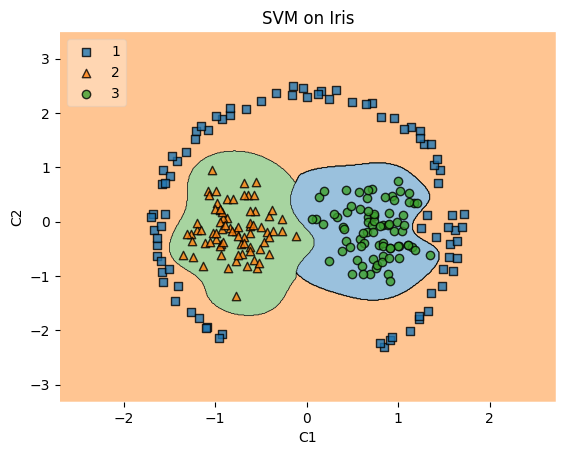

In [1299]:
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('SVM on Iris')
plt.show()

In [1300]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  0.9833333333333333


# FILE 6

In [1301]:
df = pd.read_csv("Spiral.txt", delimiter='\t', header=None, names=['C1', 'C2', 'Label'], skiprows=7)
df

,C1,C2,Label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [1302]:
X = df[["C1","C2"]]
y = np.array(df["Label"])
X

,C1,C2
0,31.95,7.95
1,31.15,7.30
2,30.45,6.65
3,29.70,6.00
4,28.90,5.55
...,...,...
307,15.75,13.85
308,15.65,14.05
309,15.65,14.25
310,15.65,14.50


In [1303]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_test

array([2, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2,
       2, 2, 3, 1, 1, 3, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1,
       2, 2, 2, 3, 2, 3, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1],
      dtype=int64)

In [1304]:
svm = SVC(C=100, kernel='rbf')
svm.fit(X_train,y_train)

SVC(C=100)

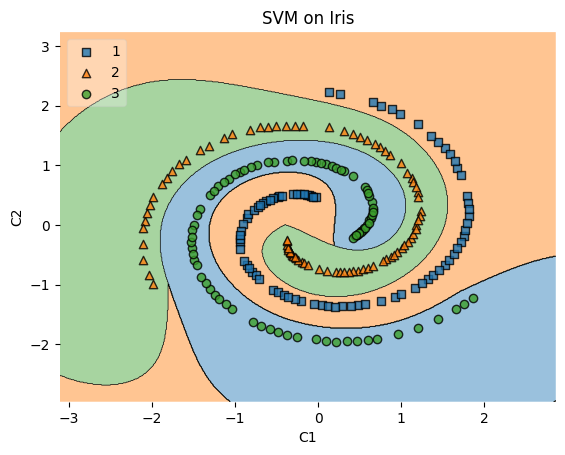

In [1305]:
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

plt.xlabel('C1')
plt.ylabel('C2')
plt.title('SVM on Iris')
plt.show()

In [1306]:
predictions = svm.predict(X_test)
print('The Accuracy of the SVM classifier is ', accuracy_score(predictions, y_test))

The Accuracy of the SVM classifier is  1.0
